##  五： 自回归模型

若序列表现出一定的相关性，则历史数据可能对预测未来有一定帮助，考虑简单情形，${r_t}$ 可以写为${r_{t - 1}}$ 的线性模型

$${r_t} = {\phi _0} + {\phi _1}{r_{t - 1}} + {\varepsilon _t},\quad \varepsilon_t\sim WN(0,\sigma^2)$$

其中${\varepsilon _t}$ 为期望为0方差为${\sigma ^2}$ 的白噪声序列。上述模型称为一阶自回归模型，记为AR(1)模型。

**条件期望和方差**

利用一阶自回归模型，我们可以推得给定前一天历史收益率条件下，当天收益率的期望和方差

$$E\left( {{r_t}|{r_{t - 1}}} \right) = {\phi _0} + {\phi _1}{r_{t - 1}},\quad {\mathop{\rm var}} \left( {{r_t}|{r_{t - 1}}} \right) = {\sigma ^2}$$

可以看出，此时的条件期望不再是收益率的长期期望0，条件方差也不是收益率的长期方差。条件收益率是以新的${\phi _0} + {\phi _1}{r_{t - 1}}$ 为中心，以白噪声方差为方差的分布。

**AR(1)模型的期望**

我们来看看最简单的一阶自回归模型的性质。模型表示为
  $${r_t} = {\phi _0} + {\phi _1}{r_{t - 1}} + {\varepsilon _t},\quad {\varepsilon _t}\sim WN\left( {0,{\sigma ^2}} \right)$$
如果序列平稳，则期望为
 $$E\left( {{r_t}} \right) = \frac{{{\phi _0}}}{{1 - {\phi _1}}}$$
 

**因果性条件或合理性条件**

对时间序列来说，${\varepsilon _t}$ 表示$t$ 时刻的白噪声，在金融时间序列中，我们称其为扰动或冲击，即由第$t$  日的新信息带来的序列变化。因此，基于新信息的性质，我们有理由假设${r_{t - j}},j > 0$ 和${\varepsilon _t}$ 是线性无关的，即${\mathop{\rm cov}} \left( {{r_{t - j}},{\varepsilon _t}} \right) = E\left( {{r_{t - j}}{\varepsilon _t}} \right) = 0$ ，有时也称这个条件为因果性条件或合理性条件。

**AR(1)模型的方差**


考虑零均值的一阶自回归模型
$${r_t} = {\phi _1}{r_{t - 1}} + {\varepsilon _t}$$
两边同时取方差，有
$${\gamma _0} = {\mathop{\rm var}} \left( {{r_t}} \right) = E\left[ {{{\left( {{\phi _1}{r_{t - 1}} + {\varepsilon _t}} \right)}^2}} \right] = \phi _1^2{\gamma _0} + {\sigma ^2}$$

可得
 $${\gamma _0} = \frac{{{\sigma ^2}}}{{1 - \phi _1^2}}$$
 

**模型平稳的充分条件**

由 $${\gamma _0} = \frac{{{\sigma ^2}}}{{1 - \phi _1^2}}$$
 我们必须要求${\rm{|}}{\phi _1}{\rm{| < 1}}$ 。这同样也是一阶自回归模型平稳的充分条件。

**AR(1)的线性时间序列表示**

当平稳条件成立时，我们可以用白噪声表示${r_t}$

$${r_t} = \frac{{{\phi _0}}}{{1 - {\phi _1}}} + \sum\limits_{j = 0}^\infty  {{{\left( {{\phi _1}} \right)}^j}{\varepsilon _{t - j}}} $$
 
我们可以通过这个表示计算方差及验证因果性条件：

$${\gamma _0} = {\sigma ^2}\sum\limits_{j = 0}^\infty  {\phi _1^{2j}}  = \frac{{{\sigma ^2}}}{{1 - \phi _1^2}}$$
$$E\left( {{r_t}{\varepsilon _{t - j}}} \right) = 0,j > 0$$

**AR(1)自相关函数，Yule-Walker方程**

我们在零均值一阶自回归模型两端同时乘${r_t}$ 并取期望，得到${\gamma _0} = {\phi _1}{\gamma _1} + {\sigma ^2}$，即
  $${\gamma _0} = {\phi _1}{\gamma _1} + {\sigma ^2}$$
两端同时乘${r_{t - k}}$ 并取期望，得
 
$${\gamma _k} = {\phi _1}{\gamma _{k - 1}}$$

这说明一阶自回归模型的协方差函数满足序列相同的形式。这个方程称为自协方差函数的Yule-Walker方程。

**AR(1)自相关函数的收敛性**

利用该方程，可以递推得到一阶自回归模型的k阶自协方差函数为：

$${\gamma _k} = {\phi _1}{\gamma _{k - 1}} = \phi _1^k{\gamma _0} = \frac{{\phi _1^k{\sigma ^2}}}{{1 - \phi _1^2}}.$$

由此可以看出k阶自协方差函数表现出负指数级的收敛性。当${\phi _1}$越小，收敛到0的速度越快。当${\phi _1}$ 为负数时，两者震荡收敛到0。

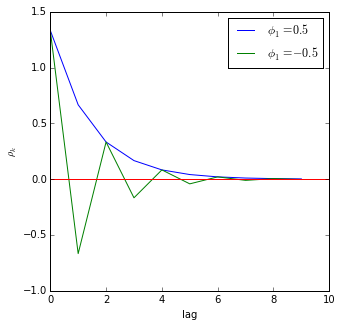

In [1]:
#导入 包 
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
k=10
K=np.arange(k)
#定义AR(1)协方差函数
def rho_ar1(K,phi,sig):
    return(phi**K*sig**2/(1-phi**2))
# 画图
plt.figure(figsize=(5,5))
plt.plot(K,rho_ar1(K,0.5,1),label=r"$\phi_1=0.5$")
plt.plot(K,rho_ar1(K,-0.5,1),label=r"$\phi_1=-0.5$")
plt.plot([0,k],[0,0])
plt.ylabel(r"$\rho_k$")
plt.xlabel(r"lag")
plt.legend()

###  AR(2) 模型的性质-定义和平稳性条件

1.	形式：${r_t} = {\phi _0} + {\phi _1}{r_{t - 1}} + {\phi _2}{r_{t - 2}} + {a_t}$            
2.	称 $\left( {1 - {\phi _1}B - {\phi _2}{B^2}} \right){r_t} = 0$ 为齐次差分方程。
3.	$A\left( z \right) = 1 - {\phi _1}z - {\phi _2}{z^2}$ 为上述齐次差分方程对应的多项式。
4.	平稳条件：多项式方程$A\left( z \right) = 1 - {\phi _1}z - {\phi _2}{z^2} = 0$ 的根的模大于1

** 各阶距，Yule Walker**

5.	均值： 
$$E\left( {{r_t}} \right) = \frac{{{\phi _0}}}{{1 - {\phi _1} - {\phi _2}}}$$
6.	ACF： 
$${\rho _0} = 1,{\rho _1} = \frac{{{\phi _1}}}{{1 - {\phi _2}}},$$
$${\rho _l} = {\phi _1}{\rho _{l - 1}} + {\phi _2}{\rho _{l - 2}},\;\;\;{\kern 1pt} l \ge 1$$
 

**周期性**

随机商业周期：如果$\phi _1^2 + 4{\phi _2} < 0,$ 则 ${r_t}$ 有周期表现，其平均周期长度为：
  
  
$$k = \frac{{2\pi }}{{{{\cos }^{ - 1}}\left[ {{\phi _1}/\left( {2\sqrt { - {\phi _2}} } \right)} \right]}}$$
  
  
如果我们将多项式$\left( {1 - {\phi _1}z - {\phi _2}{z^2}} \right) = 0$ 的解表示为$a \pm bi$ ，其中$i = \sqrt { - 1} $ ，则有${\phi _1} = 2a$ ，${\phi _2} =  - \left( {{a^2} + {b^2}} \right)$ ，记$\lambda $ 为解的幅角。


$$k = \frac{{2\pi }}{{{{\cos }^{ - 1}}\left( {a/\sqrt {{a^2} + {b^2}} } \right)}} = \frac{{2\pi }}{\lambda }$$

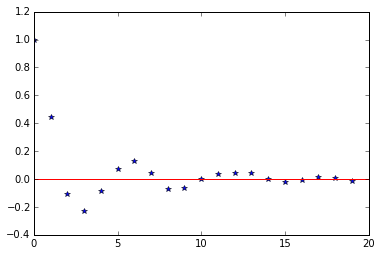

In [2]:
import pandas as pd 
n=1000
error=np.random.normal(size=n)
#plt.plot(data)
# 计算k阶自相关系数的函数

def autocoef(data,k):
    meanw=np.mean(data)
    n=len(data)    
    return np.nansum((data[:(n-k)]-meanw)*(data[k:]-meanw))/np.nansum((data-meanw)**2)
#下面这个函数生成随机数
%run ARMAgen.py
phi=[0.6,-0.4]
data=ARMAgenerator(phi=phi,theta=[],sigma=1,n=1000)
ac=[autocoef(data,i) for i in range(20)]
plt.plot(ac,"b*",[0,20],[0,0],"r-")

In [3]:
#计算周期
phi1=phi[0];phi2=phi[1]
2*np.pi/np.arccos(phi1/(2*np.sqrt(-phi2)))

5.83624408722266

In [4]:
# 特征多项式的根

phi1=0.6;phi2=-0.4
a=-phi2;b=-phi1;c=1
root1=(-b+np.sqrt(-b**2+4*a*c)*1j)/(2*a)
print root1
np.abs(root1)

(0.75+1.39194109071j)


1.5811388300841893

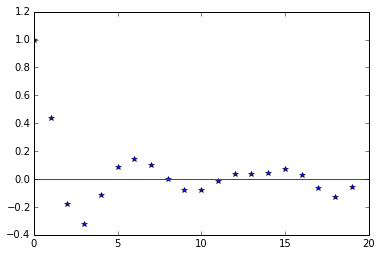

In [5]:
#也可以用statsmodels中的函数产生随机数，注意phi这里表示不一样
from statsmodels.tsa.arima_process import arma_generate_sample
phi=[1,-0.6,0.4]
data=arma_generate_sample(ar=phi,ma=[1],nsample=1000)
ac=[autocoef(data,i) for i in range(20)]
plt.plot(ac,"b*",[0,20],[0,0],"r-")

### AR(p)模型

AR(1)模型的推广为AR(p)模型，即认为当前收益率不单受前一日的影响，还受前几日的影响，模型表示如下：

$${r_t} = {\phi _0} + {\phi _1}{r_{t - 1}} +  \cdots  + {\phi _p}{r_{t - p}} + {\varepsilon _t}$$

我们讨论AR（p）模型的性质。记 $A\left( z \right) = 1 - {\phi _1}z - {\phi _2}{z^2} -  \cdots  - {\phi _p}{z^p}$ 为上述AR（p）模型的特征多项式，$A\left( z \right) = 0$ 为特征方程。如果特征方程的根都在单位圆外，则AR（p）模型是平稳模型.

### AR模型阶的识别
在实际的应用中，自回归模型的阶并非事前确定的，需要我们在建模时利用数据来确定。确定阶的方法有两种，一种利用偏相关函数，另一种利用信息准则。



#### 偏相关函数(PACF)
 对一个时间序列，我们可以对其进行不同阶的自回归分析
$$\begin{array}{rl}
{r_t} &= {\phi _{1,0}} + {\phi _{1,1}}{r_{t - 1}} + {e_{1t}},\\
{r_t} &= {\phi _{2,0}} + {\phi _{2,1}}{r_{t - 1}} + {\phi _{2,2}}{r_{t - 2}} + {e_{2t}},\\
{r_t}& = {\phi _{3,0}} + {\phi _{3,1}}{r_{t - 1}} + {\phi _{3,2}}{r_{t - 2}} + {\phi _{3,3}}{r_{t - 3}} + {e_{3t}},\\
 &\vdots 
\end{array}$$

其中， ${\phi _{i,0}}$为常数项， ${\phi _{i,j}}$为回归系数， ${e_{it}}$为误差项。上述模型具有多元回归形式，我们可以利用最小二乘法来估计参数。在所得的参数中，称${\hat \phi _{1,1}}$ 为一阶偏相关函数， ${\hat \phi _{2,2}}$为二阶偏相关函数， ${\hat \phi _{3,3}}$为三阶偏相关函数。 ${\hat \phi _{2,2}}$可以看出在AR（1）模型的基础上，再添加${r_{t - 2}}$ 时的贡献。 ${\hat \phi _{3,3}}$可以看出在AR（2）模型的基础上，再添加 ${r_{t - 3}}$时的贡献。

**利用偏相关系数判断模型的阶，及偏相关系数计算**

因此，直观地看，如果真实模型是AR（p）模型，则在AR（p）模型的基础上再添加${r_{t - p - 1}}$ 的贡献应该为0，相应的度量偏相关系数${\hat \phi _{p + 1,p{\rm{ + 1}}}}$ 就应该为0。因此得到偏相关系数后，就可以利用其是否有截尾性判断模型的阶。
理论上，对AR（p）模型，当样本足够多时，${\hat \phi _{{\rm{p}},{\rm{p}}}}$ 是收敛到${\phi _p}$ 的，当$k > p$ 时，偏相关函数${\hat \phi _{{\rm{k}},{\rm{k}}}}$ 收敛到0.并且收敛的渐进方差为$1/n$ ，其中$n$ 为样本量。


 偏相关系数${\phi _{{\rm{k}},{\rm{k}}}}$ 满足下面的方程
 $${\Gamma _k}a = {\Upsilon _k}$$
其中
 $${\Gamma _k} = \left( {\begin{array}{*{20}{c}}
{{\gamma _0}}&{{\gamma _1}}& \cdots &{{\gamma _{k - 1}}}\\
{{\gamma _1}}&{{\gamma _0}}& \cdots &{{\gamma _{k - 2}}}\\
 \vdots & \vdots &{ \vdots  \cdots }& \vdots \\
{{\gamma _{k - 1}}}&{{\gamma _{k - 2}}}& \cdots &{{\gamma _0}}
\end{array}} \right),{\Upsilon _k} = \left( {\begin{array}{*{20}{c}}
{{\gamma _1}}\\
{{\gamma _2}}\\
 \vdots \\
{\gamma k}
\end{array}} \right),a = \left( {\begin{array}{*{20}{c}}
{{\phi _{k1}}}\\
{{\phi _{k2}}}\\
 \vdots \\
{{\phi _{kk}}}
\end{array}} \right)$$
可以利用解线性方程求${\phi _{{\rm{k}},{\rm{k}}}}$ 的值。


In [6]:
#下面计算二、三阶偏相关系数，判断上述ar模型为两阶的
from scipy.linalg import toeplitz

def mypacf(ac,k):    
    r=ac[:k]
    R = toeplitz(r[:-1])
    rho = np.linalg.solve(R, r[1:])
    return(rho)
print(mypacf(ac,3))
print(mypacf(ac,4))
#95%的阀值为：
print(1.96/np.sqrt(1000))

[ 0.63025043 -0.4516038 ]
[ 0.61995656 -0.43723784 -0.02279404]
0.0619806421393


In [7]:
#也可以用如下的包中的函数，提供了计算偏相关系数的方法
from statsmodels.tsa.stattools import pacf
pacf(data,10)

array([ 1.        ,  0.43460985, -0.45271923, -0.02262739,  0.02827119,
        0.00529959,  0.0512803 ,  0.04737327, -0.01917705, -0.01563021,
       -0.01604803])

** 信息准则**

除偏相关系数外，还可以利用信息准则进行AR（p）模型阶数的选择。信息准则方法是一种应用范围更加广泛的模型选择方法。不但自回归模型可以使用信息准则选择阶数，其它任何的模型，只要需要对模型的复杂进行选择，都可以利用信息准则的思想。
  自回归模型的阶体现了模型的复杂度，阶越大，模型使用的参数越多，也就越复杂。一般来说，越复杂的模型对数据的拟合越好。但恰当的模型应该具有良好的扩展性，即模型不但对训练数据（用来进行参数估计的数据）拟合好，还需要对新的数据也有效。一般来说，如果使用过于复杂的模型拟合训练数据，就可能导致过度拟合的问题，扩展性会很差，良好的扩展性要求较简洁的模型。因此，建模是常常需要兼顾如下两个原则：

+	模型尽可能地拟合数据； 
+	模型尽可能地简洁。

** 信息准则**

如何衡量这两个原则呢？一般采用如下的两个度量：

+	残差平方和$\hat \sigma _k^2$
+	参数个数$k$。
残差平方和表示模型对数据的预测偏差的平方和，它可以用来衡量模拟对数据的拟合度；而参数个数则衡量模型的复杂程度。

** 信息准则**

在现实中，两个原则往往不能兼顾。因此需要在两者之间取得平衡，结合拟合度和参数个数(k)及样本量(N)，模型选择的信息准则有如下形式： 
 $${I_N}(k) = \log (\hat \sigma _k^2) + k\frac{{C(N)}}{N}$$

参数个数$k$   的选择遵循如下方法：  
 
 $$\hat k = \arg \mathop {\min }\limits_{k \le m}  {I_N}(k)$$
 
常见的信息准则(IC)

+	Akaike(AIC):   $C(N) = 2$
+	Schwartz or Bayesian (BIC):    $C(N) = \log (N)$
   
AIC有高估参数个数的倾向。

### 参数估计
 选择好自回归模型的阶后，AR(p)模型可以表示如下， 
 $${r_t} = {\phi _0} + {\phi _1}{r_{t - 1}} +  \cdots  + {\phi _p}{r_{t - p}} + {\varepsilon _t},\quad {\varepsilon _t}\sim WN\left( {0,{\sigma ^2}} \right)$$
其中常数项、自回归系数以及白噪声方差都需要估计。

**中心化**

如果我们首先将收益率中心化处理，
 $${x_t} = {r_t} - {\bar r_n}$$
其中${\bar r_n}$ 为所有观测的均值，则此时${x_t}$ 期望为0。此时我们估计的模型为
 $${x_t} = {a_1}{x_{t - 1}} +  \cdots  + {a_p}{x_{t - p}} + {\varepsilon _t}$$
将${x_t} = {r_t} - {\bar r_n}$ 带入上述模型得
 $${r_t} - {\bar r_n} = {a_1}\left( {{r_{t - 1}} - {{\bar r}_n}} \right) +  \cdots  + {a_p}\left( {{r_{t - p}} - {{\bar r}_n}} \right) + {\varepsilon _t}$$
进一步简化为
 
$$\begin{array}{rl}
{r_t}& = {{\bar r}_n}\left( {1 - {a_1} -  \cdots  - {a_p}} \right) + {a_1}{r_{t - 1}} +  \cdots  + {a_p}{r_{t - p}} + {\varepsilon _t}\\
 &= {{\bar r}_n}A\left( 1 \right) + {a_1}{r_{t - 1}} +  \cdots  + {a_p}{r_{t - p}} + {\varepsilon _t}
\end{array}$$
比较参数有
 $${\phi _0} = {\bar r_n}A\left( 1 \right),{\phi _1} = {a_1}, \cdots ,{\phi _p} = a_p$$

可以看出，通过中心化可以减少一个参数的计算，我们不再需要估计${\phi _0}$ 了。

**估计方法**

有很多方法可以估计自回归模型的参数，其中包括

+ 最小二乘估计，

    最小二乘估计方法是统计学中最传统的参数估计方法，它通过极小化预测偏差的平方和进行。
+ yule-walker估计，

    Yule-walker通过解估计方程${\Gamma _p}a = {\Upsilon _p}$ 完成，其中 $a = \left( {{\phi _1}, \cdots ,{\phi _p}} \right)$为自回归系数,这其实是一种矩估计

+ 极大似然估计。

    极大似然估计则假设时间序列为正态时间序列，通过极大化观测数据的似然函数估计参数。在自回归模型的参数估计中，三者差别不大。

In [8]:
# 最小二乘估计
import statsmodels.formula.api as sm
# 自回归的数据矩阵　lagmat
from statsmodels.tsa.tsatools import  lagmat
X=lagmat(data,2)
results = sm.OLS(data, X).fit()
results.summary()

In [12]:
#注1：系数的显著性检验

#注2：关于截距

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     273.7
Date:                Tue, 08 Dec 2015   Prob (F-statistic):           1.75e-95
Time:                        21:36:01   Log-Likelihood:                -1431.0
No. Observations:                1000   AIC:                             2866.
Df Residuals:                     998   BIC:                             2876.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.6306      0.028     22.325      0.000         0.575     0.686
x2            -0.4519      0.028    -15.990      0.000        -0.507    -0.396
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.731
Skew:                           0.002   Prob(JB):                        0.694
Kurtosis:                       3.132   Cond. No.                         1.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 	模型检验

通过实际的数据建立自回归模型，首先选择模型的阶，然后进行参数估计和参数的检验，但仅仅这些还不够，我们还需要从整体上分析模型的合理性。若模型是合理的，则我们事前关于模型的假设就应该基本成立。即假设数据来自模型
 $${x_t} = {a_1}{x_{t - 1}} +  \cdots  + {a_p}{x_{t - p}} + {\varepsilon _t},\quad {\varepsilon _t}\sim WN\left( {0,{\sigma ^2}} \right)$$
其中一个重要的假设是${\varepsilon _t}$ 为白噪声序列。通过实际数据计算${\varepsilon _t} = {x_t} - \left( {{a_1}{x_{t - 1}} +  \cdots  + {a_p}{x_{t - p}}} \right)$ ，记为 ${\hat \varepsilon _t}$，称为模型的残差。因此，如果模型合理，至少残差${\hat \varepsilon _t}$ 应该为白噪声序列。
    残差序列的白噪声检验可以利用卡方检验 和正态检验法。正态检验法可以利用残差的自相关系数判断。 



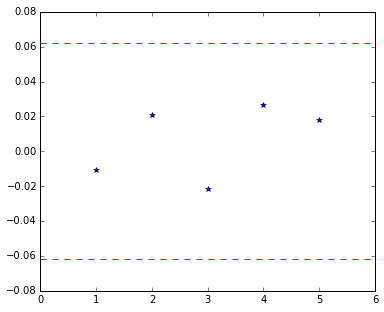

In [9]:
k=5
autoco=[autocoef(results.resid,i) for i in range(k+1)]
n=len(results.resid)
plt.figure(figsize=(6,5))
plt.plot(range(1,k+1),autoco[1:],"b*",[0,k+1],[1.96/np.sqrt(n)]*2,"r--",[0,k+1],[-1.96/np.sqrt(n)]*2,"r--")


In [10]:
results.aic,results.bic

(2865.9152126870022, 2875.7307232449666)

### 预测

金融时间序列分析除了可以用来解释金融现象，还有一个重要的应用是利用历史信息对未来进行预测。对AR(p)模型
 $${x_t} = {a_1}{x_{t - 1}} +  \cdots  + {a_p}{x_{t - p}} + {\varepsilon _t},\quad {\varepsilon _t}\sim WN\left( {0,{\sigma ^2}} \right)$$
假定我们在时间为t的点上，想要预测${r_{t + k}}$ ，其中 $k$大于0。时间指标t称为预测原点（forecast origin），正整数$k$ 称为预测步长（forecast horizon）。利用历史数据 ${r_1}, \cdots ,{r_t}$，我们可以用很多函数来预测 ${r_{t + k}}$，但究竟选择哪一个呢？我们需要定义一种准则来履行这样的任务。最小均方是准则之一，它选择使预测误差的平方期望最小的预测方法。记${\hat r_t}(k)$ 为以$t$ 为预测原点，步长为$k$ 的对${r_{t + k}}$ 的最小均方误差预测，则有对任何预测函数$g$ ，有
$$E{\left[ {{r_{t + k}} - {{\hat r}_t}\left( k \right)} \right]^2} \le \mathop {\min }\limits_g {\left( {{r_{t + k}} - g} \right)^2}$$

#### 向前一步预测

考虑AR(p)模型
 $${x_{t + 1}} = {a_1}{x_t} +  \cdots  + {a_p}{x_{t + 1 - p}} + {\varepsilon _{t + 1}},\quad {\varepsilon _{t + 1}}\sim WN\left( {0,{\sigma ^2}} \right)$$
在均方误差损失最小的前提下，给定参数估计值和历史的观测${x_t}, \cdots ,{x_{t + 1 - p}}$ ， ${x_{t + 1}}$的点估计为其条件期望
 $${\hat x_t}(1) = E\left( {{x_{t + 1}}|{x_t}, \cdots ,{x_{t + 1 - p}}, \cdots } \right) = {a_1}{x_t} +  \cdots  + {a_p}{x_{t + 1 - p}}$$
相应的预测误差为${e_t}\left( 1 \right) = {x_{t + 1}} - {\hat x_t}(1) = {\varepsilon _{t + 1}}$ ，从而，向前1步预测的方差为 ${\mathop{\rm var}} \left( {{e_t}\left( 1 \right)} \right) = {\mathop{\rm var}} \left( {{\varepsilon _{t + 1}}} \right) = {\sigma ^2}$，若白噪声为正态白噪声，则 ${x_{t + 1}}$的95%的预测区间为 ${\hat x_t}(1) \pm 1.96\sigma $。在计量经济学文献中，称 ${\varepsilon _{t + 1}}$为 $t + 1$时刻的扰动，它同时也是一步预测误差。



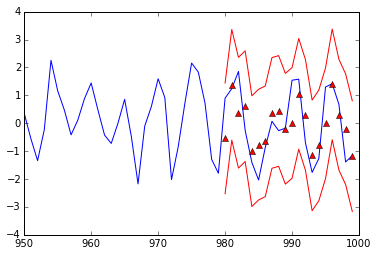

In [11]:
#一步预测和真值的比较，以及预测区间
plt.plot(range(950,1000),data[950:1000],"b-",range(980,1000),results.predict()[980:1000],"r^")
sig=results.resid.std()
pred=results.predict()
plt.plot( range(980,1000),pred[980:1000]+1.96*sig,"r-", range(980,1000),pred[980:1000]-1.96*sig,"r-")

#### 向前两步预测

考虑以$t$ 为预测原点，对 $t + 2$时刻的预测。模型可以写为：
 $${x_{t + 2}} = {a_1}{x_{t + 1}} +  \cdots  + {a_p}{x_{t + 2 - p}} + {\varepsilon _{t + 2}},\quad {\varepsilon _{t + 2}}\sim WN\left( {0,{\sigma ^2}} \right)$$
预测为历史的条件期望，计算如下：
 $${\hat x_t}(2) = E\left( {{x_{t + 2}}|{x_t}, \cdots ,{x_{t + 1 - p}}, \cdots } \right) = {a_1}{\hat x_t}(1) +  \cdots  + {a_p}{x_{t + 2 - p}}$$
其预测误差为
$$\begin{array}{rl}
{e_t}\left( 2 \right) &= {x_{t + 2}} - {{\hat x}_t}\left( 2 \right)\\
& = {x_{t + 2}} - \left( {{a_1}{{\hat x}_t}(1) +  \cdots  + {a_p}{x_{t + 2 - p}}} \right)\\
 &= {x_{t + 2}} - {a_2}{x_t} +  \cdots  + {a_p}{x_{t + 2 - p}} - {a_1}{{\hat x}_t}(1)\\
&= {a_1}{x_{t + 1}} + {\varepsilon _{t + 2}} - {a_1}{{\hat x}_t}(1)\\
& = {\varepsilon _{t + 2}} + {a_1}{\varepsilon _{t + 1}}
\end{array}$$
预测方差为$\left( {1 + a_1^2} \right){\sigma ^2}$ 。在正态假设下，和一步预测类似，我们可以得到任何置信度的预测区间。注意到两步预测的方差比一步预测的方差大一些，这说明两步预测的不确定性比一步预测更大，这和常识是一致的：我们对越远的未来进行预测，把握越小。


#### 向前K步预测

一般地，自回归模型有：
$${x_{t + k}} = {a_1}{x_{t + k - 1}} +  \cdots  + {a_p}{x_{t + k - p}} + {\varepsilon _{t + k}}$$
以$t$ 时刻为预测原点，对${x_{t + k}}$ 的预测由如下的递推公式给出：
 
 $${\hat x_t}\left( k \right) = \sum\limits_{i = 1}^p {{a_i}{{\hat x}_t}\left( {k - i} \right)} $$
其中${\hat x_t}(j) = {x_{t + j}}$ 如果$j \le 0$。通过对$i = k - 1,k - 2, \cdots ,1$ 的计算，就可以得到对${x_{t + k}}$ 的预测。可以证明，向前k步预测的方差随着k的增大而增大，并且会收敛到时间序列${x_t}$ 的方差。这表明，随着k的增大，预测不确定性增加，并且预测结果会趋向于没有任何信息时的预测（用期望预测）。

通过预测的期望和方差，在误差正态假设下，我们可以给出预测的区间.